# Coursework 2: k-means clustering
In this coursework, you will implement and test an unsupervised machine learning algorithm: _k-means clustering_. Once you have completed your work, you will need to submit the results on QM+. To submit your work, first download/export your Jupyter notebook as PDF. Then upload the PDF file in the submission area on QM+.

## Task 1: Prepare two test datasets
Pick a small set of values that enable you to apply clustering using pen&paper. Next create a fresh, or find an existing, large dataset. You may choose to use the Iris dataset, which is included in scikit-learn (and also available as a CSV file on QM+, generated using the below code snippet).
> Marking information: Up to 10 points: clarify why you believe your small dataset to be suitable for k-means clustering. Also make sure you report the source of your large dataset. 

### Task 1.1: the small dataset

The small test dataset will consist of 11 data points (observations) and 2 features `a` and `b`:

| Index | a | b |
| --- | --- | --- |
| 0 | 1 | 2 |
| 1 | 2 | 1 |
| 2 | 7 | 7 |
| 3 | 2 | 3 |
| 4 | 3 | 2 |
| 5 | 10 | 4 |
| 6 | 3 | 3 |
| 7 | 4 | 3 |
| 8 | 4 | 8 |
| 9 | 8 | 4 |
| 10 | 6 | 5 |

This data set naturally splits into 2 cluster (as demonstrated in the scatter plot below), however data points are spread out enough to require interations in order to reach the final result.

<function matplotlib.pyplot.show(close=None, block=None)>

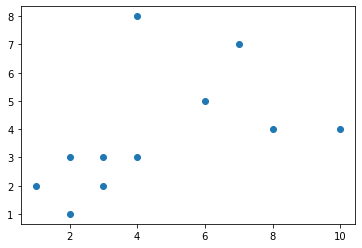

In [202]:
small_dataset = [[1,2], [2,1], [7,7], [2,3], [3,2], [10,4], [3,3], [4,3], [4,8], [8,4], [6,5]]

import numpy as np

array = np.array(small_dataset)
x = array[:,0]
y = array[:,1]

plt.scatter(x, y)
plt.show

### Task 1.2: The large dataset

The Iris dataset will be utilised as the large dataset.

In [50]:
#large data set - Iris data set
from sklearn.datasets import load_iris
iris = load_iris()

iris_dataset = iris.data.tolist()
iris_dataset

[[5.1, 3.5, 1.4, 0.2],
 [4.9, 3.0, 1.4, 0.2],
 [4.7, 3.2, 1.3, 0.2],
 [4.6, 3.1, 1.5, 0.2],
 [5.0, 3.6, 1.4, 0.2],
 [5.4, 3.9, 1.7, 0.4],
 [4.6, 3.4, 1.4, 0.3],
 [5.0, 3.4, 1.5, 0.2],
 [4.4, 2.9, 1.4, 0.2],
 [4.9, 3.1, 1.5, 0.1],
 [5.4, 3.7, 1.5, 0.2],
 [4.8, 3.4, 1.6, 0.2],
 [4.8, 3.0, 1.4, 0.1],
 [4.3, 3.0, 1.1, 0.1],
 [5.8, 4.0, 1.2, 0.2],
 [5.7, 4.4, 1.5, 0.4],
 [5.4, 3.9, 1.3, 0.4],
 [5.1, 3.5, 1.4, 0.3],
 [5.7, 3.8, 1.7, 0.3],
 [5.1, 3.8, 1.5, 0.3],
 [5.4, 3.4, 1.7, 0.2],
 [5.1, 3.7, 1.5, 0.4],
 [4.6, 3.6, 1.0, 0.2],
 [5.1, 3.3, 1.7, 0.5],
 [4.8, 3.4, 1.9, 0.2],
 [5.0, 3.0, 1.6, 0.2],
 [5.0, 3.4, 1.6, 0.4],
 [5.2, 3.5, 1.5, 0.2],
 [5.2, 3.4, 1.4, 0.2],
 [4.7, 3.2, 1.6, 0.2],
 [4.8, 3.1, 1.6, 0.2],
 [5.4, 3.4, 1.5, 0.4],
 [5.2, 4.1, 1.5, 0.1],
 [5.5, 4.2, 1.4, 0.2],
 [4.9, 3.1, 1.5, 0.2],
 [5.0, 3.2, 1.2, 0.2],
 [5.5, 3.5, 1.3, 0.2],
 [4.9, 3.6, 1.4, 0.1],
 [4.4, 3.0, 1.3, 0.2],
 [5.1, 3.4, 1.5, 0.2],
 [5.0, 3.5, 1.3, 0.3],
 [4.5, 2.3, 1.3, 0.3],
 [4.4, 3.2, 1.3, 0.2],
 [5.0, 3.5,

## Task 2: Apply k-means clustering on paper
Work through your small dataset from Task 1 to ensure you have known-good results.
> Marking information: Up to 20 points: include information on how you sanity-checked your results as the number of iterations may considerably affect the precision of your final values.


### Task 2.1: Break down of K-means clustering and the detailed algorithm in English

K-means clustering is a machine learning method that partitions `n observations` into `k clusters` so that each observation belongs to the cluster whose mean (centroid) is closest in distance.

LLoyd's algorithm (naive K-means) will be used for this clustering for the small data set as well as the code implementation. This algorithm breaks into 4 steps (essentially 3 actions as step 4 only repeats previous steps):

1. **Initialization step**: Choosing at random `k` number of independent *data points* from the data set (`k` corresponds to the *desired number of clusters*) as initial *centroids*.

2. **Assignment step**: 
    1. Assign each and every *observation* to the *cluster* with the nearest mean to that *observation* (the distance is measured using squared Euclidean distance, which is the sum of squared difference of all features. Essentially, for each observation $i$, we calculate $$ Min (\sum_{p=1}^{t} (i_{x_p} - m_{x_p}^j)^2 )\forall j, 1	\leq j	\leq k $$, with $x_p$ representing all features used for clustering, $m^j$ being the *centroids* specified in step 1. 
    1. Then we assign the *observation* to whichever *cluster* whose *centroid* corresponds to the *minimum distance calculated* (if there are multiple *clusters* with the same distance between its *centroid* and the *observation*, then the *observation* will be assigned to whichever *cluster* considered first.
    
3. **Update step**: The *cluster's centroid* will be re-calculated as the mean value of the *observations* in the *cluster*.

4. **Break step**: Evaluate whether there has been changes in *cluster assignment* and/or *centroid movement*. (For convenience of operation, these movements from here on will be quantified as having the squared Euclidean distance between the previous centroid and the newly obtained centroid as 0, meaning the clustering wil be completed when the sum of Euclidean distances between previous centroids and their corresponding new values is 0). Repeat steps 2 and 3 if yes. 

Thus, the flow chart for the programme that perform k-means clustering is as follows:

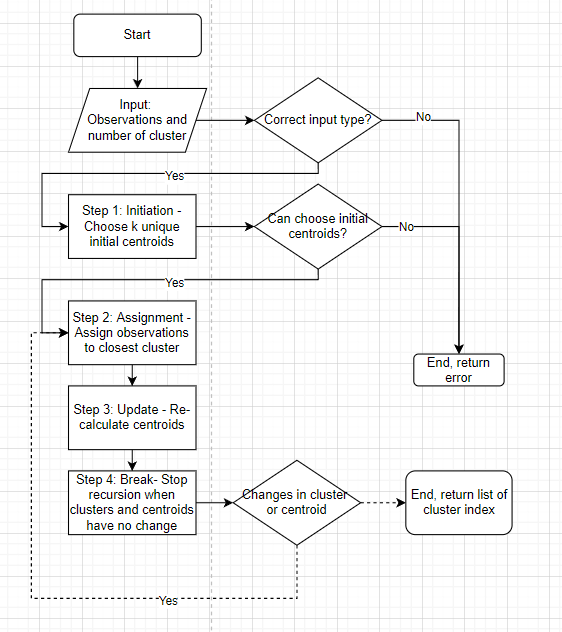

In [217]:
from IPython import display
display.Image("C:/Users/Huy's/OneDrive/qmul_2021-22/programming_foundation/"
              "coursework/flow_chart.png")


### Task 2.2: Calculations for the small dataset

For the small dataset example, all observations will be partitioned into 2 clusters. The steps detailed above will be followed:

1. Iteration 0 - Step 1 - **Initialization**: Observations 2 (7, 7) and 5 (10, 4) will be used as initial centroids, centroid 0 and centroid 1 respectively. 

2. Iteration 0 - Step 2 - **Assignment**: The squared Euclidean distance between each observation and these 2 centroids are the squared difference between the observation's `a` feature and each centroid's, plus the squared difference between the observation's `a` feature and each centroid's. This is calculated in the table below:

| Index | a | b | a_dist_cen_0 | b_dist_cen_0 | a_dist_cen_1 | b_dist_cen_1 | 
| --- | --- | --- | --- | --- | --- | --- | 
| 0 |	1 |	2 |	(1-7)^2=36 |	(2-7)^2=25 |	(1-10)^2=81	|	(2-4)^2=4 |
| 1 |	2 |	1 |	(2-7)^2=25 |	(1-7)^2=36 |	(2-10)^2=64	|	(1-4)^2=9 |
| 2 |	7 |	7 |	(7-7)^2=0 |	(7-7)^2=0 |	(7-10)^2=9	|	(7-4)^2=9 |
| 3 |	2 |	3 |	(2-7)^2=25 |	(3-7)^2=16 |	(2-10)^2=64	|	(3-4)^2=1 |
| 4 |	3 |	2 |	(3-7)^2=16 |	(2-7)^2=25 |	(3-10)^2=49	|	(2-4)^2=4 |
| 5 |	10 |	4 |	(10-7)^2=9 |	(4-7)^2=9 |	(10-10)^2=0	|	(4-4)^2=0 |
| 6 |	3 |	3 |	(3-7)^2=16 |	(3-7)^2=16 |	(3-10)^2=49	|	(3-4)^2=1 |
| 7 |	4 |	3 |	(4-7)^2=9 |	(3-7)^2=16 |	(4-10)^2=36	|	(3-4)^2=1 |
| 8 |	4 |	8 |	(4-7)^2=9 |	(8-7)^2=1 |	(4-10)^2=36	|	(8-4)^2=6 |
| 9 |	8 |	4 |	(8-7)^2=1 |	(4-7)^2=9 |	(8-10)^2=4	|	(4-4)^2=0 |
| 10 |	6 |	5 |	(6-7)^2=1 |	(5-7)^2=4 |	(6-10)^2=16	|	(5-4)^2=1 |

This yields the distances to each centroid and thus the cluster for each as:

| Index | a | b | dist_cen_0 | dist_cen_1 | cluster_index
| --- | --- | --- | --- | --- | --- |
|0	|1	|2	|61	|85	|0|
|1	|2	|1	|61	|73	|0|
|2	|7	|7	|0	|18	|0|
|3	|2	|3	|41	|65	|0|
|4	|3	|2	|41	|53	|0|
|5	|10	|4	|18	|0	|1|
|6	|3	|3	|32	|50	|0|
|7	|4	|3	|25	|37	|0|
|8	|4	|8	|10	|52	|0|
|9	|8	|4	|10	|4	|1|
|10	|6	|5	|5	|17	|0|

3. Iteration 0 - Step 3 - **Update**: The centroid of each cluster is re-calculated as the mean of the observations in the cluster, specifically (rounded to 2 decimal places):

| Cluster | a | b | 
| --- | --- | --- | 
| 0 | 3.56 | 3.78  |
| 1 | 9 | 4 |

4. Iteration 0 - Step 4 - **Break**: There has been movement in clusters' centroids, as centroid 0 moved from (7,7) to (3.56, 3.78), and centroid 0 moved from (10,4) to (9,4). This means we have not obtained the optimum clustering. 

Therefore, we proceed to iteration 1:

5. Iteration 1 - Step 2: Following the same calculations, the distances and corresponding cluster for each observation given the new centroids are as follows:

| Index | a | b | dist_cen_0 | dist_cen_1 | cluster_index
| --- | --- | --- | --- | --- | --- |
|0	|1	|2	|9.69	|68.00	|0|
|1	|2	|1	|10.14	|58.00	|0|
|2	|7	|7	|22.25	|13.00	|1|
|3	|2	|3	|3.02	|50.00	|0|
|4	|3	|2	|3.47	|40.00	|0|
|5	|10	|4	|41.58	|1.00	|1|
|6	|3	|3	|0.91	|37.00	|0|
|7	|4	|3	|0.80	|26.00	|0|
|8	|4	|8	|18.02	|41.00	|0|
|9	|8	|4	|19.80	|1.00	|1|
|10	|6	|5	|7.47	|10.00	|0|

6. Iteration 1 - Step 3: The centroid of each cluster is re-calculated as the mean of the observations in the cluster, specifically (rounded to 2 decimal places):

| Cluster | a | b | 
| --- | --- | --- | 
| 0 | 3.13 | 3.38  |
| 1 | 8.33 | 5 |

7. Iteration 1 - Step 4: There has been movement in clusters' centroids, as centroid 0 moved from (3.56, 3.78) to (3.13, 3.38), and centroid 0 moved from (9,4) to (8.33,5). This means we have not obtained the optimum clustering. 

Therefore, we proceed to iteration 2:

8. Iteration 2 - Step 2: Following the same calculations, the distances and corresponding cluster for each observation given the new centroids are as follows:

| Index | a | b | dist_cen_0 | dist_cen_1 | cluster_index |
| --- | --- | --- | --- | --- | --- |
|0	|	1	|	2	|	6.41	|	62.78	|	0	|
|1	|	2	|	1	|	6.91	|	56.11	|	0	|
|2	|	7	|	7	|	28.16	|	5.78	|	1	|
|3	|	2	|	3	|	1.41	|	44.11	|	0	|
|4	|	3	|	2	|	1.91	|	37.44	|	0	|
|5	|	10	|	4	|	47.66	|	3.78	|	1	|
|6	|	3	|	3	|	0.16	|	32.44	|	0	|
|7	|	4	|	3	|	0.91	|	22.78	|	0	|
|8	|	4	|	8	|	22.16	|	27.78	|	0	|
|9	|	8	|	4	|	24.16	|	1.11	|	1	|
|10	|	6	|	5	|	10.91	|	5.44	|	1	|


9. Iteration 2 - Step 3: The centroid of each cluster is re-calculated as the mean of the observations in the cluster, specifically (rounded to 2 decimal places):

| Cluster | a | b | 
| --- | --- | --- | 
|0	|	2.71	|	3.14	|
|1	|	7.75	|	5.00	|

10. Iteration 2 - Step 4: There has been movement in clusters' centroids, as centroid 0 moved from (3.13, 3.38) to (2.71, 3.14), and centroid 0 moved from (8.33,5) to (7.75,5). This means we have not obtained the optimum clustering. 

Therefore, we proceed to iteration 3:

11. Iteration 3 - Step 2: Following the same calculations, the distances and corresponding cluster for each observation given the new centroids are as follows:

| Index | a | b | dist_cen_0 | dist_cen_1 | cluster_index
| --- | --- | --- | --- | --- | --- |
|	0	|	1	|	2	|	2.36	|	48.96	|	0	|
|	1	|	2	|	1	|	2.03	|	46.16	|	0	|
|	2	|	7	|	7	|	42.03	|	1.96	|	1	|
|	3	|	2	|	3	|	0.69	|	31.76	|	0	|
|	4	|	3	|	2	|	0.36	|	28.96	|	0	|
|	5	|	10	|	4	|	59.03	|	11.56	|	1	|
|	6	|	3	|	3	|	0.69	|	22.76	|	0	|
|	7	|	4	|	3	|	2.69	|	15.76	|	0	|
|	8	|	4	|	8	|	34.36	|	14.76	|	1	|
|	9	|	8	|	4	|	33.03	|	3.56	|	1	|
|	10	|	6	|	5	|	19.36	|	1.36	|	1	|

12. Iteration 3 - Step 3: The centroid of each cluster is re-calculated as the mean of the observations in the cluster, specifically (rounded to 2 decimal places):

| Cluster | a | b | 
| --- | --- | --- | 
|0	|	 2.50 	|	 2.33 	|
|1	|	 7.00 	|	 5.60 	|


13. Iteration 3 - Step 4: There has been movement in clusters' centroids, as centroid 0 moved from (2.71, 3.14) to (2.5, 2.33), and centroid 0 moved from (7.75,5) to (7,5.6). This means we have not obtained the optimum clustering. 

Therefore, we proceed to iteration 4:

14. Iteration 4 - Step 2: Following the same calculations, the distances and corresponding cluster for each observation given the new centroids are as follows:

| Index | a | b | dist_cen_0 | dist_cen_1 | cluster_index
| --- | --- | --- | --- | --- | --- |
|0	|	1	|	2	|	6.41	|	62.78	|	0	|
|1	|	2	|	1	|	6.91	|	56.11	|	0	|
|2	|	7	|	7	|	28.16	|	5.78	|	1	|
|3	|	2	|	3	|	1.41	|	44.11	|	0	|
|4	|	3	|	2	|	1.91	|	37.44	|	0	|
|5	|	10	|	4	|	47.66	|	3.78	|	1	|
|6	|	3	|	3	|	0.16	|	32.44	|	0	|
|7	|	4	|	3	|	0.91	|	22.78	|	0	|
|8	|	4	|	8	|	22.16	|	27.78	|	0	|
|9	|	8	|	4	|	24.16	|	1.11	|	1	|
|10	|	6	|	5	|	10.91	|	5.44	|	1	|


15. Iteration 4 - Step 3: The centroid of each cluster is re-calculated as the mean of the observations in the cluster, specifically (rounded to 2 decimal places):

| Cluster | a | b | 
| --- | --- | --- | 
|0	|	 2.50 	|	 2.33 	|
|1	|	 7.00 	|	 5.60 	|

16.  Iteration 4 - Step 4: There has NOT been movement in clusters' centroids. This means we have obtained the optimum clustering, thus completing the clustering. The clusters and centroids assigned in iteration 4 is the final result of 2-means clustering.

### Task 2.3: Sanity check 

A sanity check is carried out by using the label for colouring the 2 clusters in the previous cluster, and the centroids are added in the same scatter plot, which indicates the clustering is indeed correct.  

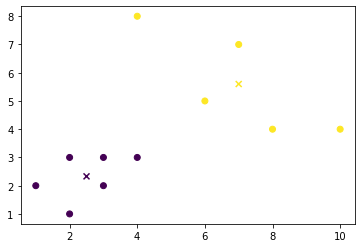

In [200]:
#import library
import matplotlib.pyplot as plt

#set final centroid  
final_centroids = [[2.5, 2.33], [7,5.6]]
x_centroid=np.array(final_centroids)[:,0]
y_centroid=np.array(final_centroids)[:,1]

#plot
plt.scatter(x, y, c=t)
plt.scatter(x_centroid,y_centroid,marker = "x", c=[0,1])
plt
plt.show()

Another check is carried out by using Scikit learn's K-means clustering class. The result is similar.

In [211]:
#Assign initial centroids
centre_1 = np.array([7, 7])
centre_2 = np.array([10, 4])
initial_centroids = np.row_stack([centre_1, centre_2])

#import and fit small data to K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(array)

#print labels, values of clusters and number of iterations
print(kmeans.labels_)
print(kmeans.cluster_centers_)
print(kmeans.n_iter_)

[1 1 0 1 1 0 1 1 0 0 0]
[[7.         5.6       ]
 [2.5        2.33333333]]
2


## Task 3: Create a test harness
Start preparing your implementation by first setting up a test (without having an implementation just yet!). In this way, you will follow a _test-driven development_ approach. As part of this work, you may choose to compare to a reference implementation, like the one shown in the below code example.
> Marking information: Up to 20 points: identify suitable unit tests and integration tests. Explain what coverage you expect your test suite to have.

### Task 3.1: Unit tests

First, unit tests will be created for each of the step specified in Task 2.

#### Task 3.1.1: Unit test - Initiation:
This has to ensure that the function for this step returns a list of initial centroids that:
1. Have the same number of data points as requested
2. All these data points are unique
3. All these data points are in the orginal data set.

Points 1 and 2 can be covered by comparing a set containing the generated initial centroid with k; while point 3 can be covered by looping through the list generated and assert whichever item is not in the original input data set.

In [159]:
def ini_centroid_test(data=[], k=0):
    "Unit test for initiation function"
    #blackbox testing
    test_data_1 = [[1,2,3],[13,84,235],[23,37,41],[144,875,612]]
    test_data_2 =[[1],[2],[3]]
    for _ in range(1000):
        #check with test data 1
        assert sorted(ini_centroid(test_data_1, 3)) in [[[1,2,3],[13,84,235],[23,37,41]],
                                          [[1,2,3],[23,37,41],[144,875,612]],
                                          [[1,2,3],[13,84,235],[144,875,612]],
                                          [[13,84,235],[23,37,41],[144,875,612]]], ('not yielding '
                                                                                    'expected initial ' 
                                                                                    'centroids')
        #check with test data 2
        assert sorted(ini_centroid(test_data_2, 2)) in [[[1],[2]], 
                                                           [[1],[3]], 
                                                           [[2],[3]]], ('not yielding '
                                                                        'expected initial ' 
                                                                        'centroids')
        
    #white-box testing
    
    #check length of set of all centroid vs k
    ini_centroids = ini_centroid(data, k)
    assert len(set(tuple(obsv) for obsv in ini_centroids)) == k, ('not yielding the right number '
                                                        f'of initial centroids: {k}') 
    
    #check every item generated in list of initial centroid whether in original data set
    for centroid in ini_centroids:
        assert centroid in data, (f'initial centroid {centroid} not in original data set')
        


#### Task 3.1.2: Unit test - Assignment:

Essentially, 2 sub-functions are required for this step: 
1. A sub-function calculating the squared Euclidean distance between 2 given points
2. A sub-function assigning each observation points to the index of the nearest centroid (this will be utilized as the index for cluster itself). 

The unit tests will test the overall results returned by the assigning function and each of the 2 sub-functions given different data points (with different number of dimensions). 

In [179]:
   
# - sub-function testing calculating distance 
def distance_test(a=[], b=[]):
    "Unit test for the distance calculation sub-function of the assigning function"
    #check distance between 2 data points on 1 dimension 
    assert distance([3], [4]) == 1, ('Not returning correct distance (1d)')
    assert distance([4], [4]) == 0, ('Not returning correct distance (1d)')

    #check distance between 2 data points on 2 dimensions
    assert distance([2,1], [3,0]) == 2, ('Not returning correct distance (2d)')
    #check distance between A and B vs B and A to see if different 
    assert distance([3,0], [2,1]) == distance([2,1], [3,0]), ('Not returning correct distance (2d)')

    #check distance between 2 data points on 3 dimensions
    assert distance([10, 42, 15], [0, 40, 10]) == 129, ('Not returning correct distance (3d)')

    #Squared Euclidean cannot be smaller than 0
    assert distance([], []) >= 0, ('Distance cannot be less than 0')

# - sub-function testing assigning data point to smallest distance 
def get_min_index_test():
    "Unit test for the finding the minimum index sub-function of the assigning function"
    #minimum of list with 1 item
    assert get_min_index([10]) == 0, ('Not returning correct minimum distance')
    #minimum of list with multiple items
    assert get_min_index([10, 20.321, 1.2]) == 2, ('Not returning correct minimum distance')
    #minimum of list with multiple instances of minimum value
    assert get_min_index([1, -0.111, 0, 2, 3, 0.11, -0.111]) == 1, ('Not returning correct '
                                                                   'minimum distance')
    
#main test function testing entire assignment step (including calling the 2 sub-functions above)    
def assign_test(data=[], centroids=[]):
    "Unit test for assigning function"
    #white box testing with each sub-function 
    distance_test()
    get_min_index_test()
    #blackbox testing
    assert assign(data=[[3,2], [3,3]], centroids=[[3,3], [3,2]]) == [1,0], ("Not assigning correct "
                                                                            "clusters")
    assert assign(data=[[4,2], [5,3], [9,4]], 
                  centroids=[[100,100], [6,6]]) == [1,1,1], ("Not assigning correct "
                                                             "clusters")



#### Task 3.1.3: Unit test - Update:

This step requires 1 function to re-calculate each cluster's centroid as the mean value of all observations in the cluster. The unit test for this function will test whether the function returns the correct mean value for each set of inputs.

In [154]:
def centroid_recal_test():
    "Unit test for the centroid re-calculation of the update function"
    assert centroid_recal([[3], [4]], [0,1]) == [[3], [4]], ('Not returning correct mean with 1 point '
                                                             'each cluster')
    assert centroid_recal([[-1,2], [3,4], [1.5,5], [5,6]],
                         [0,1,0,1]) == [[0.25,3.5],[4,5]], ('Not returning correct mean with 2 points '
                                                             'each cluster (2d)')
    assert centroid_recal([[69,10,1,4], [96,420,3,5.6], [0,1,1,1], [0,1,1,1]],
                         [1,1,0,0]) == [[0,1,1,1],[82.5,215,2,4.8]], ('Not returning correct mean with'
                                                                      ' 2 points each cluster (4d)')


#### Task 3.1.4: Unit test - Break:

As broken down in Part 1, this step essentially requires a conditional statement to decide whether to stop the recursion of the functions. Therefore the test for this is essentially part of the integration test.

### Task 3.2: Integration test:

The main steps of K-means clustering all uses the output of the last step as its input, which is quite straightforward, therefore the integration test will attempt to provide conditional coverage that covers all possible flows (detailed in the flow-chart above) of the main function:

In [143]:
# sub-function testing first condition to throw exception if data input is not nested list
def type_error_test():
    """
    Test to see if code correctly regulates the type of data input
    """
    try:
        k_means_clustering(data=[[1,2],2], k=2)
        assert False, f"Function not throwing Type Exception with wrong input type"
    except TypeError as exc:
        assert True
        
#test second condition to throw exception if data input cannot be assigned to k clusters
def value_error_test():
    """
    Test to see if code correctly regulates data input - number of unique data points >= k
    """
    try:
        k_means_clustering(data=[[1,2],[1,2]], k=2)
        assert False, f"Function not throwing Value Exception with wrong input value"
    except ValueError as exc:
        assert True

def integration_test():        
    type_error_test()            
    value_error_test()
    
    #test function with case without needing more than 1 iteration
    two_obs_dataset = [[2.5,1], [5,3]]
    result_two_obs_dataset = k_means_clustering(data=two_obs_dataset, k=2)
    
    assert (((result_two_obs_dataset['Centroids'] == [[2.5,1], [5,3]]) &
            (result_two_obs_dataset['Cluster Index'] == [0,1])) |
            ((result_two_obs_dataset['Centroids'] == [[5,3], [2.5,1]]) &
            (result_two_obs_dataset['Cluster Index'] == [1,0]))
           ), "Error clustering with initial centroids as final centroids"
            
    #test whole function by small data set and large data set
    #small data set
    result_small_dataset = k_means_clustering(data=small_dataset, k=2)
    assert (((result_small_dataset['Centroids'] == [[2.50,2.33],[7.00, 5.60]]) &
            (result_small_dataset['Cluster Index'] == [0,0,1,0,0,1,0,0,1,1,1])) |
            ((result_small_dataset['Centroids'] == [[7.00, 5.60],[2.50,2.33]]) &
            (result_small_dataset['Cluster Index'] == [1,1,0,1,1,0,1,1,0,0,0]))
           ), "Error clustering with small data set"
    
    #Iris data set
    result_iris_dataset = k_means_clustering(data=iris_dataset, k=3)
    assert (((result_iris_dataset['Centroids'] == [[6.85,3.07,5.74,2.07],
                                                    [5.01,3.43,1.46,0.25],
                                                    [5.90,2.75,4.39,1.43]]) &
            (result_iris_dataset['Cluster Index'] == [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                                                       1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                                                       1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,
                                                       2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
                                                       2,2,2,2,2,2,2,2,2,0,2,2,2,2,2,2,2,
                                                       2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,2,
                                                       0,0,0,0,2,0,0,0,0,0,0,2,2,0,0,0,0,
                                                       2,0,2,0,2,0,0,2,2,0,0,0,0,0,2,0,0,
                                                       0,0,2,0,0,0,2,0,0,0,2,0,0,2])) |
            ((result_iris_dataset['Centroids'] == [[5.01,3.43,1.46,0.25],
                                                    [6.85,3.07,5.74,2.07],
                                                    [5.90,2.75,4.39,1.43]]) &
            (result_iris_dataset['Cluster Index'] == [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                                       0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                                       0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,
                                                       2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
                                                       2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,
                                                       2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,
                                                       1,1,1,1,2,1,1,1,1,1,1,2,2,1,1,1,1,
                                                       2,1,2,1,2,1,1,2,2,1,1,1,1,1,2,1,1,
                                                       1,1,2,1,1,1,2,1,1,1,2,1,1,2])) |
            ((result_iris_dataset['Centroids'] == [[6.85,3.07,5.74,2.07],
                                                    [5.90,2.75,4.39,1.43],
                                                    [5.01,3.43,1.46,0.25]]) &
            (result_iris_dataset['Cluster Index'] == [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
                                                       2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
                                                       2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,
                                                       1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                                                       1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,
                                                       1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,
                                                       0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,
                                                       1,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,
                                                       0,0,1,0,0,0,1,0,0,0,1,0,0,1])) |
            ((result_iris_dataset['Centroids'] == [[5.01,3.43,1.46,0.25],
                                                     [5.90,2.75,4.39,1.43],
                                                     [6.85,3.07,5.74,2.07]]) &
            (result_iris_dataset['Cluster Index'] == [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                                       0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                                       0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,
                                                       1,2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                                                       1,1,1,1,1,1,1,1,1,2,1,1,1,1,1,1,1,
                                                       1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,1,
                                                       2,2,2,2,1,2,2,2,2,2,2,1,1,2,2,2,2,
                                                       1,2,1,2,1,2,2,1,1,2,2,2,2,2,1,2,2,
                                                       2,2,1,2,2,2,1,2,2,2,1,2,2,1])) |
            ((result_iris_dataset['Centroids'] == [[5.90,2.75,4.39,1.43],
                                                    [6.85,3.07,5.74,2.07],
                                                    [5.01,3.43,1.46,0.25]]) &
            (result_iris_dataset['Cluster Index'] == [2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
                                                       2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
                                                       2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,
                                                       0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                                       0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,
                                                       0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,
                                                       1,1,1,1,0,1,1,1,1,1,1,0,0,1,1,1,1,
                                                       0,1,0,1,0,1,1,0,0,1,1,1,1,1,0,1,1,
                                                       1,1,0,1,1,1,0,1,1,1,0,1,1,0])) |
            ((result_iris_dataset['Centroids'] == [[5.90,2.75,4.39,1.43],
                                                    [5.01,3.43,1.46,0.25],
                                                    [6.85,3.07,5.74,2.07]]) &
            (result_iris_dataset['Cluster Index'] == [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                                                       1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
                                                       1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,
                                                       0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,
                                                       0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,
                                                       0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,
                                                       2,2,2,2,0,2,2,2,2,2,2,0,0,2,2,2,2,
                                                       0,2,0,2,0,2,2,0,0,2,2,2,2,2,0,2,2,
                                                       2,2,0,2,2,2,0,2,2,2,0,2,2,0]))
           ), "Error clustering with iris data set"
    


## Task 4: Implement k-means clustering in Python

You are now set to actually add the implementation. Note that you are expected to fully implement the mathematical operations instead of using a library function such as `scikit` or `statsmodels`. Your implementation may make several assumptions about the inputs provided to it. Make those explicit in comments. Also, provide an estimate on how long execution of your algorithm will take dependent on the input values. Express this estimate as a function of the inputs, such as the number of clusters and/or the number of data points.
> Marking information: Up to 50 points: 30 points for a correctly working Python implementation, 10 points for describing limitations and assumptions of your implementation, and 10 points for a description of the complexity of your algorithm.


## Task 4.1: K-means clustering implementation

First all the sub-functions and functions for each step will be created.

All these sub-functions will then be put together into a function that takes 2 arguments: the data-set: `data` and the number of cluster: `k`. This function assumes that:
1. `Data`: The `data` input is a list, with each element a nested list containing the values of whatever number of features for each data point. The length of all nested list must be equal, as each element of this nested list is considered the value of a particular feature for that observation. The length of the overall list represents the number of data points input for clustering. 

2. `k`: The `k` input is an integer. The number of clusters must be less than or equal to the number of unique data points that was input.

In [183]:
import random as rand
#sub-function to use in generating random initial centroids
def append_rand_distinct (data=[], list_=[]):
    "Appends the `list_` with random values from data that are not in the list"
    range_choice = list(range(len(data)))
    i = rand.choice(range_choice)
    x = data[i]
    if x not in list_:
        list_.append(x)
    else:
        range_choice = range_choice.pop(i)
        append_rand_distinct (data, list_)
    return list_

#Initiation function - step 1
def ini_centroid(data, k):
    "Returns `k` random but unique initial centroids"
    initial_centroids = []    
    for _ in range(k):
        append_rand_distinct(data, initial_centroids)
    return initial_centroids

#Functions to be used in assignment step: 
# - sub-function calculating distance between 2 data points
def distance(a=[], b=[]):
    "Returns the squared Euclidean distance between 2 data points"
    return sum([(a[i]-b[i])**2 for i in range(len(a))])

# - sub-function finding the index of the smallest distance
def get_min_index(data=[]):
    """Find the index of the item with the minimum value in a list 
    (defaults returns the smallest index if there are multiple items with minimum value)"""
    min_value=min(data)
    return data.index(min_value)

#Assignment function - step 2
def assign(data=[], centroids=[]):
    "Assign each data point in `data` to their corresponding cluster, given the `centroids`"
    distance_list = [[distance(x,centroid) for centroid in centroids] 
                     for x in data]
    cluster_index = [get_min_index(i) for i in distance_list]
    return cluster_index

#Functions to be used in update step: 
# - sub-function to get mean of a list of values
def mean(data=[]):
    "Returns the mean (average) value of a list"
    return sum(data)/len(data)

#Update function - step 3
def centroid_recal(data=[], cluster_index=[]):
    "Recalculates the centroids of each cluster given data and data's cluster index"
    new_centroids=[]
    for i in range(len(set(cluster_index))):
        cluster_data=[data[x] for x in range(len(data)) if index[x]==i]
        new_centroid=[mean([dim[z] for dim in cluster_data]) for z in range(len(cluster_data[0]))]
        new_centroids.append(new_centroid)
    return new_centroids



The final function:

In [172]:
def k_means_clustering(data=[],k=3):
    """
    Returns clustering results given the data and the number of clusters to partition the data by.
    1. `Data`: The data set to perform k-means clustering on. 
                type: list. 
                The data input is a list, with each element representing a data point.
                Each of this element has to be a nested list, the element of which represents 
                the value of a particular feature for each data point. 
                The length of all nested list must be equal.  

    2. `k`: The number of clusters to partition data by. 
            type: int.
            The number of clusters must be less than or equal to the number of unique data points.
    
    This function returns a dictionary containing 3 items:
    1. 'Number of iteration': (int) the number of iterations the function to reach the final cluster.
    2. 'Centroids': (list) the centroids of the final clusters.
    3. 'Cluster_index': (list) the index of the cluster that each data point belongs to (starts from 0).
        This corresponds to the order of the input data.
        
        
    E.g.: k_means_clustering(data=[[1, 2], [3, 4]], 2)
    >>  {'Number of iteration': 0, 'Centroids': [[1, 2], [3, 4]], 'Cluster_index':[0, 1]}
    """
    for x in data:
        if type(x) != list:
            raise TypeError(f'Input data not in correct format (index {x})' 
                                'Input data required to be list containing nested list of same length, '
                                'each of which represents attributes of one observation')
        elif len(x)!= len(data[0]):
            raise TypeError(f'Input data not in correct format (index {x}) ' 
                            'Input data required to be list containing nested list of same length, '
                            'each of which represents attributes of one observation')
    
    if len(set(tuple(obsv) for obsv in data)) < k:
        raise ValueError('Number of distinct observations ' 
                         f'smaller than number of desired centroid ({k})')
    else:    
        centroids = ini_centroid(data, k)
        no_iter = 0
        cluster_index = assign(data=data, centroids=centroids)
        new_centroids = centroid_recal(data,cluster_index)
        
        while centroids != new_centroids:
            centroids=new_centroids
            no_iter+=1
            cluster_index = assign(data=data, centroids=centroids)
            new_centroids = centroid_recal(data,cluster_index)
            
        centroids= [[round(x,2) for x in centroid] for centroid in centroids]
        
    return {'Number of iteration': no_iter, 'Centroids': centroids, 'Cluster Index': cluster_index}
        


This function is used against both data sets for a quick sanity check. The results seems to be correct. 

In [182]:
small_result = k_means_clustering(small_dataset, 2)
iris_result = k_means_clustering(iris_dataset, 3)

print(small_result)     
print(iris_result)


{'Number of iteration': 1, 'Centroids': [[2.5, 2.33], [7.0, 5.6]], 'Cluster Index': [0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1]}
{'Number of iteration': 5, 'Centroids': [[6.85, 3.07, 5.74, 2.07], [5.01, 3.43, 1.46, 0.25], [5.9, 2.75, 4.39, 1.43]], 'Cluster Index': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2]}
{'Number of iteration': 0, 'Centroids': [[1], [2]], 'Cluster Index': [0, 1]}


## Task 4.2: Testing the function and function limitations
This function is further tested by the created unit test and integration tests.

The function passes all unit tests, however when re-running the integration test function, there were times (not all) where the test asserts a different result for the iris data set compared to sklearn. This is a limitation of the current function as well as the K-means clustering method itself, as it chooses `k` intial centroids at random and iterates until there are no further changes in cluster and centroid, and these randomness will affect the final result, meaning the function may not return a single result every time for one data set.

This can be preventable, as demonstrated in sklearn's implementation, by using a different technique of initializing centroids (k-means++), or by running the clustering multiple times with different initial centroids and choosing the best performing cluster (the cluster that minimizes the total within cluster sum of squares). Currently the function does not calculate such a statistic, or can perform these comparisons.

In [187]:
#unit tests
ini_centroid_test()
assign_test()
centroid_recal_test()


In [188]:
# integration test fail
integration_test()

AssertionError: Error clustering with iris data set

In [214]:
# integration test pass
integration_test()
print('checking')

checking


## Task 4.3: Function complexity estimation:

The following break down of function complexity assumes that the inputs (`data` and `k`) are of correct type. 
Let `k` denotes the number of clusters, `n` denotes the number data points, `d` denotes the number of dimensions (or features), and `i` denotes the number of iterations needed to be performed until the final cluster.

The algorithm can be estimated by breaking down each step:

1. Initial step: This requires picking out k number of data points from n, meaning it will take up $k*I$ time (I being the time to pick up 1 random data point.

2. Assigment step: This requires looping through the entire `n` number of data points and 
    1. Calculating the distance of each of the `d` number of dimensions compared to each of the `k` number of clusters;
    2. Adding all of the dimension distance up;
    3. Finding the smallest value among the k distances. 
    Therefore the complexity of this step can be denoted as $n*(dkE + kA(d) + M(k))$, with E being the time it takes to calculate the squared Euclidean distance between 2 numbers; A(d) being the time it takes to add d numbers together; M(k) being the time it takes to find the minimum index among k numbers.

3. Update step: This requires looping through `k` clusters and calculating the length and sum of all data points in each cluster, and then dividing the 2 number for `d` dimensions. Therefore the complexity of this step can be denoted as $\sum_{1}^{k} d(L(n_k) + A(n_k) + D)$, with $n_k$ being the number of data points in each cluster,  $L(n_k)$ being the time it takes to find the length of a list with n_k number, $A(n_k)$ being the time it takes to add $n_k$ numbers together, and D is the time it takes to divide 2 numbers.

4. Break step: This requires comparing 2 lists representing the new centroids and the old centroids with `k` elements, with each element a nested list with `d` elements. Therefore the complexity of this step can be denoted as $C(k)*C(d)$, with C(i) being the time it takes to compare 2 lists with `i` elements.

The algorithm's run time also depends on how many iterations required to find the final clusters. The steps 2, 3 and 4 will be repeated as many times as the value of this number of iterations.

Therefore, the final function of complexity of this algorithm is:

$$k*I + i( n*(dkE + kA(d) + M(k))+\sum_{1}^{k} d(L(n_k) + A(n_k) + D)+C(k)*C(d))$$

## Optional Task 5: Add a visualisation
Identify a suitable library to depict both your inputs as well as the results of k-means clustering applied to those inputs.
> Marking information: Up to 20 _bonus_ points: if you choose to complete this _optional_ task, you may be able to recover marks lost elsewhere.

The visualization for the small data set have been performed above in Task 2's sanity check.

Therefore here only the visualization of the iris dataset will be provided, using scatter matrix plot from pandas to visualize a 4-dimensional dataset using multiple 2-dimensional scatter plots: 

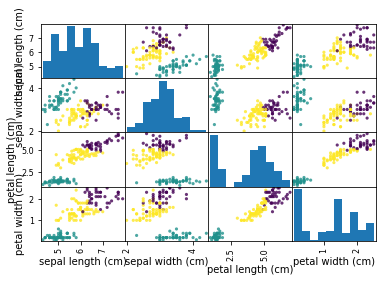

In [216]:
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix

cluster_iris = iris_result['Cluster Index']

#creating data frame for pandas
dataframe = pd.DataFrame(iris['data'], columns=iris['feature_names'])
#ploting scatter graph of species comparing all features to each other
scatter_matrix(dataframe, c=cluster_iris,
               marker='o', s=10,alpha=.8)
plt.show()